In [1]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline


In [20]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')


In [12]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


Load the training data into a dataframe named df_train_data 

Create binary classification problem - rename some class labels

Create a dataframe of 9 features named X, drop column 9.

Create a data frame of labels named y, select only column 9.

Split the data into a training set and a test set.


In [21]:
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

X=df_train_data.drop(columns=[9])
y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [22]:
y_train.value_counts()

0    9253
1    1622
Name: 9, dtype: int64

Instantiate a Logistic Regression classifier with a lbfgs solver.

Fit the classifier to the data.


In [23]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calculate and print the accuracy of the model on the test data.



In [26]:
model_score=model.score(X_test, y_test)
print(model_score)

0.8264827586206897


Use the dummy classifier to calculate the accuracy of a purely random chance.


In [49]:
dumbdumb = DummyClassifier(strategy = 'uniform')
dumbdumb.fit(X_train, y_train)
dumbdumb.score(X_test, y_test)

0.5020689655172413

The LR model is much higher, meaning it's better than picking class 1 or 0 by random chance (We don't know if it's better than always picking the dominant y value, though. So we have no idea if it's actually good)

In [50]:
dumbdumb = DummyClassifier(strategy = 'most_frequent')
dumbdumb.fit(X_train, y_train)
dumbdumb.score(X_test, y_test)

0.8529655172413793

Picking the most frequent class is is actually better than our model, meaning it's not very good

Print the confusion matrix

In [28]:
predictions = model.predict(X_test)
confusion = confusion_matrix(y_test, predictions)
print(confusion)


[[2969  123]
 [ 506   27]]


Print the F1, F beta, precision, recall and accuracy scores.



In [30]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)
print('accuracy')
print(accuracy)
print('precision')
print(precision)
print('recall')
print(recall)
print('f1')
print(f1)
print('fbeta_precision')
print(fbeta_precision)
print('fbeta_recall')
print(fbeta_recall)

accuracy
0.8264827586206897
precision
0.18
recall
0.05065666041275797
f1
0.07906295754026355
fbeta_precision
0.11915269196822595
fbeta_recall
0.05915863277826468


I'm pretty sure the labels on the answer key's confusion matrix are backwards.

9. Print a classification report


In [32]:
classification = classification_report(y_test, predictions, target_names=['0', '1'])
print(classification)


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3092
           1       0.18      0.05      0.08       533

    accuracy                           0.83      3625
   macro avg       0.52      0.51      0.49      3625
weighted avg       0.76      0.83      0.78      3625



In [33]:
probs = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.844


Text(0, 0.5, 'True Positive Rate')

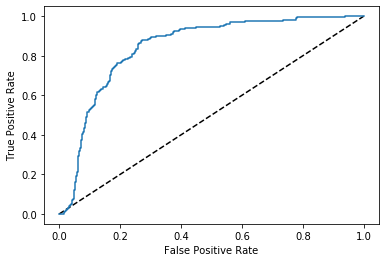

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
# fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.



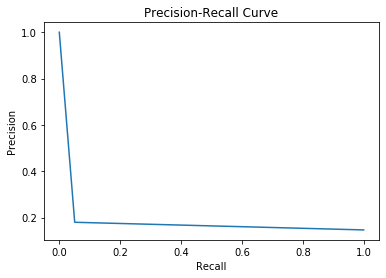

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [40]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    model2=LogisticRegression(C=c,max_iter=1000)
    model2.fit(X_train, y_train)
    test_accuracy.append(model2.score(X_test, y_test))
    train_accuracy.append(model2.score(X_train, y_train))


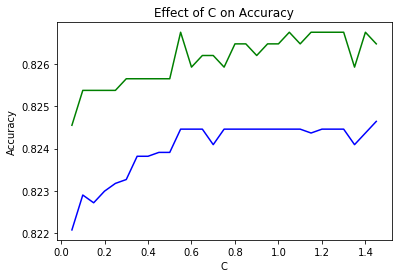

In [42]:
# ax1 = fig.add_subplot(1, 1, 1)
plt.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
plt.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
plt.xlabel('C') 
plt.ylabel('Accuracy')
plt.title('Effect of C on Accuracy')
plt.show()

Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.



In [43]:
cv_scores=cross_val_score(model, X_train, y_train, cv = 5)

In [44]:
print(cv_scores)
print(cv_scores.mean())

[0.82482759 0.82206897 0.81931034 0.8308046  0.82344828]
0.8240919540229885


Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?



In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [54]:
knnscore=knn.score(X_test,y_test)
print(knnscore)

0.9988965517241379


The accuracy is much better, therefore either the hyperparameters of the linear classifier are wrong (which, since you can see that after changing C you still can't match knn, it probably isn't C), or it isn't linearly separable.

Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.



In [55]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
print(rf_score)

1.0
